Proposed solution to FiveThirtyEight's Riddler column Oct 16, 2020 by Mark Mark
<br>
<url>https://fivethirtyeight.com/features/is-the-price-right/</url>
<br>
<br>
<i>
Riddler Express
<br>
As you may have seen in FiveThirtyEight’s reporting, there’s an election coming up. Inspired, Vikrant Kulkarni has an electoral enigma for you:

On Nov. 3, the residents of Riddler City will elect a mayor from among three candidates. The winner will be the candidate who receives an outright majority (i.e., more than 50 percent of the vote). But if no one achieves this outright majority, there will be a runoff election among the top two candidates.

If the voting shares of each candidate are uniformly distributed between 0 percent and 100 percent (subject to the constraint that they add up to 100 percent, of course), then what is the probability of a runoff?

Extra credit: Suppose there are N candidates instead of three. What is the probability of a runoff?
</i>

In [124]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt 

In [139]:
def determine_if_runoff_needed(candidate_result_list):

    leading_candidates_result = np.max(candidate_result_list)
    
    if leading_candidates_result > 0.50:
        # someone won
        return False
    else:
        return True
    

def simulate_vote(number_of_candidates, abs_tol=1e-8):
    # draw number_of_candidate random numbers and re-normalize so sum is unity
    candidate_result_list = [random.random() for _ in range(number_of_candidates)]
    candidate_result_list = np.array(candidate_result_list)/sum(candidate_result_list)
    
    # sanity check         
    if not isclose(sum(candidate_result_list), 1.0, abs_tol=abs_tol) or len(candidate_result_list) != number_of_candidates:
        print(f'Critical error -- election results do not add to unity: {isclose(sum(candidate_result_list), 1.0, abs_tol=abs_tol)} {sum(candidate_result_list)}')
        print(f'Critical error -- results list has different size than number of candidates: {len(candidate_result_list) != number_of_candidates} {len(candidate_result_list)}')
    
    # determine if the election is successful or a 
    needs_runoff = determine_if_runoff_needed(candidate_result_list=candidate_result_list)
        
    return needs_runoff

def run_elections(min_number_of_candidates=3, max_number_of_candidates=5, number_of_samples=10000):
    
    candidate_pool_results =[]
    for number_of_candidates in range(3, 10):
        election_cycles = [simulate_vote(number_of_candidates=number_of_candidates) for _ in range(number_of_samples)]
        # get fraction of run-off elections needed on average
        fraction_with_runoff = np.mean(election_cycles)
        # uncertainty of the mean
        unc_fraction_with_runoff = np.std(election_cycles)/np.sqrt(len(election_cycles) - 1)

        candidate_pool_results.append([number_of_candidates, fraction_with_runoff, unc_fraction_with_runoff])
        
    return np.array(candidate_pool_results)
    
    

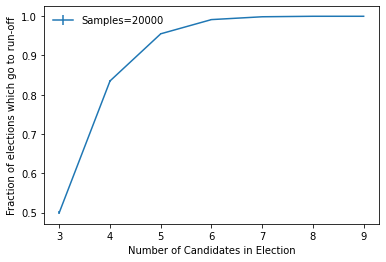

In [144]:
# get election results 
n_samples = 20000 # we can vary the number of samples to check for convergence, but here we have multiple order of magnitude between value and stat uncertainty
election_results = run_elections(number_of_samples=n_samples)
plt.errorbar(x=election_results[:,0], y=election_results[:,1], yerr=election_results[:,2], label=f'Samples={n_samples}')
plt.xlabel('Number of Candidates in Election')
plt.ylabel('Fraction of elections which go to run-off')
plt.legend(frameon=False)
plt.show()

In [159]:
three_candidate_result = election_results[election_results[:,0]==3][0]
print(f'For three candidates, the probabilty for a run-off is: {round(three_candidate_result[1]*100,2)}+/-{round(three_candidate_result[2]*100,2)}%')
      

For three candidates, the probabilty for a run-off is: 50.02+/-0.35%


array([[3.        , 0.5002    , 0.00353562]])